In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'C:\Users\KARTHIKA\Downloads\Data_Train.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

In [5]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.loc[ data['Route'].isnull() | data['Total_Stops'].isnull() ]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# DURATION : hrs to mins

In [12]:
def hr_to_min(Duration):
    if len(Duration.split())==2:
        hours=Duration.split()[0][:-1]
        minutes=Duration.split()[1][:-1]
        hour=int(hours)
        mins=int(minutes)
        return hour*60 + mins
    else:
        x=Duration[:-1]
        minutes_1=int(x)
        return minutes_1*60
    

In [13]:
data['Duration'] = data['Duration'].apply(hr_to_min)

In [14]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [15]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data.dtypes

C:\Users\KARTHIKA\AppData\Local\Temp\ipykernel_21596\3947326048.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
C:\Users\KARTHIKA\AppData\Local\Temp\ipykernel_21596\3947326048.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])


Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2024-08-04 22:20:00,2024-03-22 01:10:00,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-04 05:50:00,2024-08-04 13:15:00,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-04 09:25:00,2024-06-10 04:25:00,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2024-08-04 18:05:00,2024-08-04 23:30:00,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2024-08-04 16:50:00,2024-08-04 21:35:00,285,1 stop,No info,13302


In [17]:
data['Dep_time_in_hour']=data['Dep_Time'].dt.hour
data['Dep_time_in_minute']=data['Dep_Time'].dt.minute
data['Arrival_time_in_hour']=data['Arrival_Time'].dt.hour
data['Arrival_time_in_minute']=data['Arrival_Time'].dt.minute

In [18]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_time_in_hour,Dep_time_in_minute,Arrival_time_in_hour,Arrival_time_in_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2024-08-04 22:20:00,2024-03-22 01:10:00,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-04 05:50:00,2024-08-04 13:15:00,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-04 09:25:00,2024-06-10 04:25:00,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2024-08-04 18:05:00,2024-08-04 23:30:00,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2024-08-04 16:50:00,2024-08-04 21:35:00,285,1 stop,No info,13302,16,50,21,35


In [19]:
data.drop(['Dep_Time','Arrival_Time'],axis=1 , inplace=True)

In [20]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_in_hour,Dep_time_in_minute,Arrival_time_in_hour,Arrival_time_in_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


In [21]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data.dtypes

C:\Users\KARTHIKA\AppData\Local\Temp\ipykernel_21596\2864525458.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])


Airline                           object
Date_of_Journey           datetime64[ns]
Source                            object
Destination                       object
Route                             object
Duration                           int64
Total_Stops                       object
Additional_Info                   object
Price                              int64
Dep_time_in_hour                   int32
Dep_time_in_minute                 int32
Arrival_time_in_hour               int32
Arrival_time_in_minute             int32
dtype: object

In [22]:
data['day']=data['Date_of_Journey'].dt.day
data['Month']=data['Date_of_Journey'].dt.month
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_in_hour,Dep_time_in_minute,Arrival_time_in_hour,Arrival_time_in_minute,day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


In [23]:
data.drop('Date_of_Journey', axis=1 , inplace=True)

In [24]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_in_hour,Dep_time_in_minute,Arrival_time_in_hour,Arrival_time_in_minute,day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


In [25]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [26]:
data['Total_Stops']=data['Total_Stops'].map({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})

In [27]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_in_hour,Dep_time_in_minute,Arrival_time_in_hour,Arrival_time_in_minute,day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35,1,3


In [28]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [29]:
data.drop('Additional_Info', axis=1, inplace=True)

In [30]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_time_in_hour,Dep_time_in_minute,Arrival_time_in_hour,Arrival_time_in_minute,day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3


In [31]:
data.select_dtypes(include='object').columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

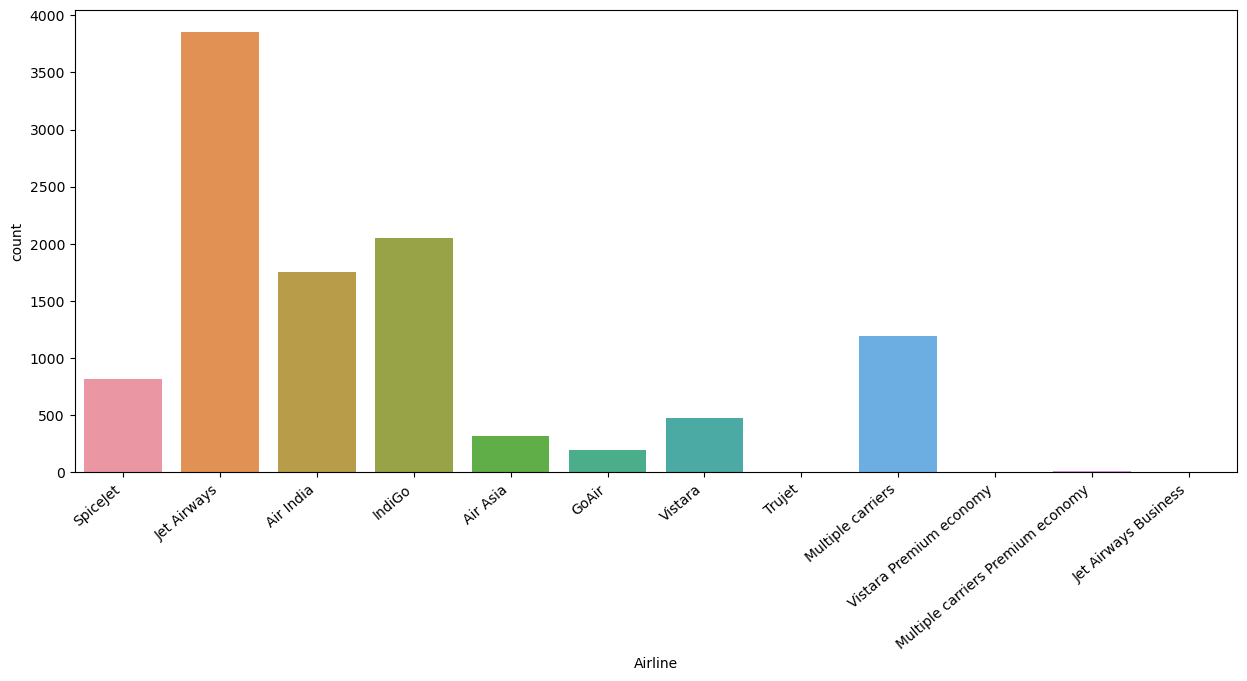

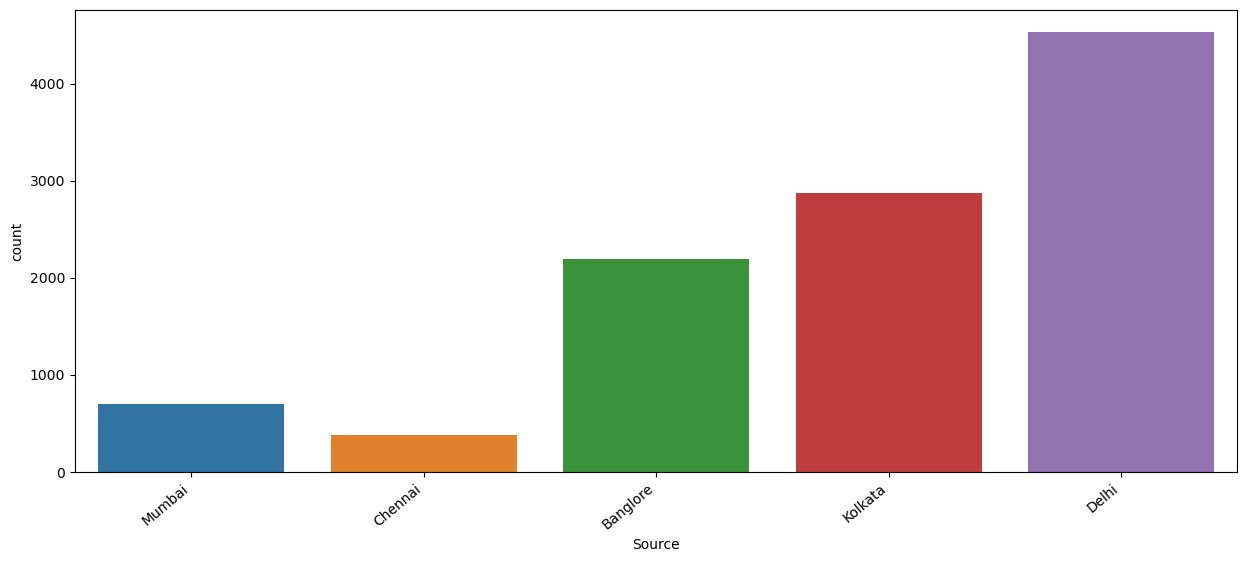

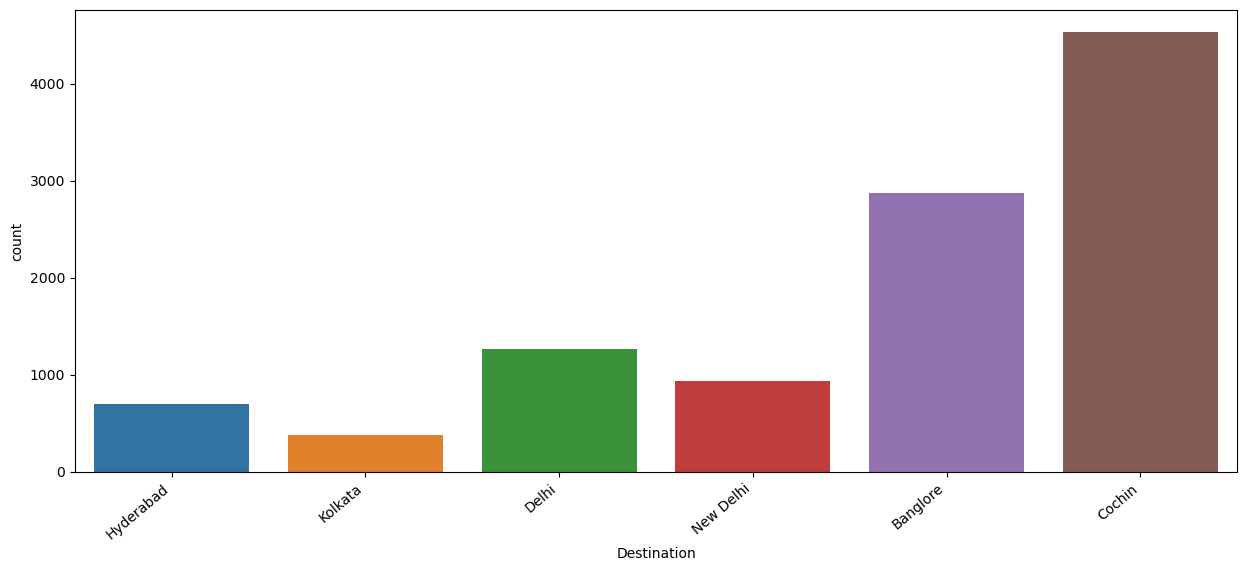

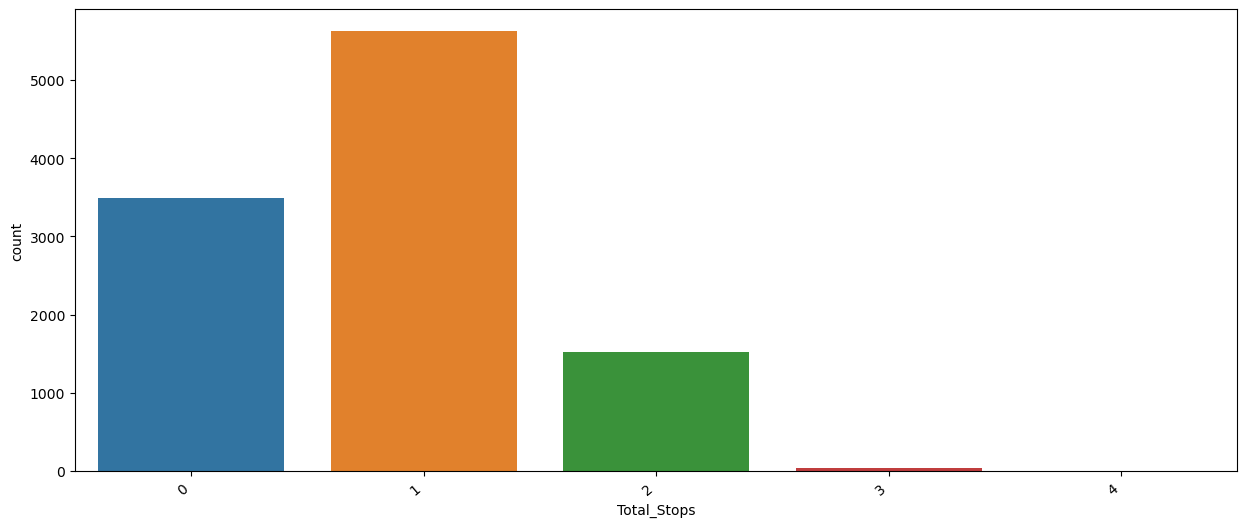

In [32]:
for i in ['Airline','Source','Destination','Total_Stops']:
    plt.figure(figsize = (15,6))
    ax=sns.countplot( x=i , data=data.sort_values('Price', ascending=True) )
    ax.set_xticklabels(ax.get_xticklabels() , rotation=40, ha='right')
    plt.tight_layout
    plt.show()
    print('\n\n')
    

In [33]:
data['Airline'].value_counts().sort_values(ascending=False)

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

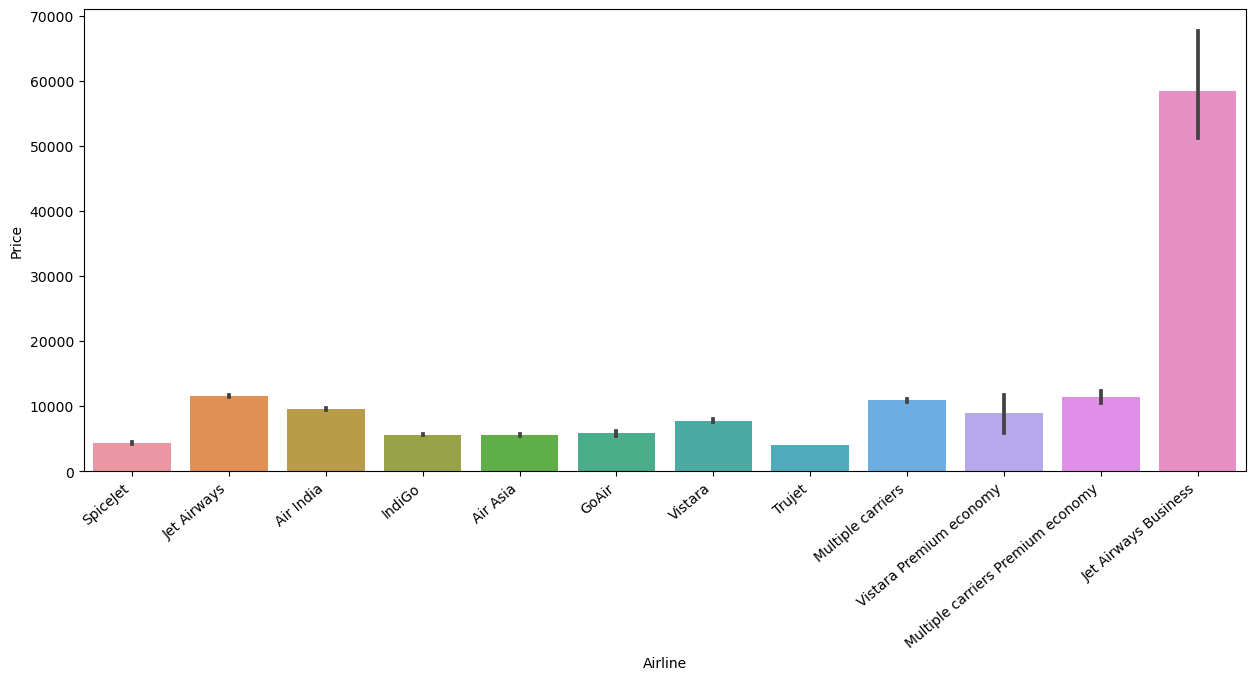

In [34]:
plt.figure(figsize = (15,6))
ax=sns.barplot( x = 'Airline' , y = 'Price' , data = data.sort_values('Price' , ascending = True))
ax.set_xticklabels(ax.get_xticklabels() , rotation=40 , ha='right')
plt.tight_layout
plt.show()

In [35]:
data.groupby('Airline').describe()['Price'].sort_values('mean' , ascending = False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


In [36]:
airline = pd.get_dummies( data['Airline'] , drop_first = True , dtype = 'int')
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [37]:
data = pd.concat([data , airline] , axis = 1)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_time_in_hour,Dep_time_in_minute,Arrival_time_in_hour,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,...,0,1,0,0,0,0,0,0,0,0


In [38]:
data.drop('Airline' , axis = 1 , inplace = True)

In [39]:
data.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Dep_time_in_hour,Dep_time_in_minute,Arrival_time_in_hour,Arrival_time_in_minute,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,...,0,1,0,0,0,0,0,0,0,0


In [40]:
data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [41]:
data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [42]:
list1 = ['Source' , 'Destination']

In [43]:
for i in list1:
    print(data[[i]].value_counts() )

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64
Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
Name: count, dtype: int64


In [44]:
data = pd.get_dummies(data = data , columns = list1 , drop_first = True , dtype = 'int' )

In [45]:
data.head()

,Route,Duration,Total_Stops,Price,Dep_time_in_hour,Dep_time_in_minute,Arrival_time_in_hour,Arrival_time_in_minute,day,Month,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,...,0,0,0,0,0,0,0,0,0,1


In [46]:
data.dtypes

Route                                object
Duration                              int64
Total_Stops                           int64
Price                                 int64
Dep_time_in_hour                      int32
Dep_time_in_minute                    int32
Arrival_time_in_hour                  int32
Arrival_time_in_minute                int32
day                                   int32
Month                                 int32
Air India                             int32
GoAir                                 int32
IndiGo                                int32
Jet Airways                           int32
Jet Airways Business                  int32
Multiple carriers                     int32
Multiple carriers Premium economy     int32
SpiceJet                              int32
Trujet                                int32
Vistara                               int32
Vistara Premium economy               int32
Source_Chennai                        int32
Source_Delhi                    

In [47]:
route = data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [48]:
data['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [49]:
route['route_1'] = route['Route'].str.split('→').str[0]
route['route_2'] = route['Route'].str.split('→').str[1]
route['route_3'] = route['Route'].str.split('→').str[2]
route['route_4'] = route['Route'].str.split('→').str[3]
route['route_5'] = route['Route'].str.split('→').str[4]

route.head()

C:\Users\KARTHIKA\AppData\Local\Temp\ipykernel_21596\2066559154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['route_1'] = route['Route'].str.split('→').str[0]
C:\Users\KARTHIKA\AppData\Local\Temp\ipykernel_21596\2066559154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['route_2'] = route['Route'].str.split('→').str[1]
C:\Users\KARTHIKA\AppData\Local\Temp\ipykernel_21596\2066559154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Route,route_1,route_2,route_3,route_4,route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [50]:
route.fillna('None' , inplace = True)

C:\Users\KARTHIKA\AppData\Local\Temp\ipykernel_21596\2177349376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None' , inplace = True)


In [51]:
route.head()

,Route,route_1,route_2,route_3,route_4,route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in range(1,6):
    col = 'route_'+str(i)
    route[col] = le.fit_transform(route[col])

route.head()

C:\Users\KARTHIKA\AppData\Local\Temp\ipykernel_21596\1343677731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col])
C:\Users\KARTHIKA\AppData\Local\Temp\ipykernel_21596\1343677731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col])
C:\Users\KARTHIKA\AppData\Local\Temp\ipykernel_21596\1343677731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Route,route_1,route_2,route_3,route_4,route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [53]:
route.drop('Route' , axis = 1 , inplace = True)

C:\Users\KARTHIKA\AppData\Local\Temp\ipykernel_21596\1062967714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.drop('Route' , axis = 1 , inplace = True)


In [54]:
route.head()

,route_1,route_2,route_3,route_4,route_5
0,0,13,29,13,5
1,2,25,1,3,5
2,3,32,4,5,5
3,2,34,3,13,5
4,0,34,8,13,5


In [55]:
data = pd.concat([data , route] , axis = 1)

In [56]:
data.head()

,Route,Duration,Total_Stops,Price,Dep_time_in_hour,Dep_time_in_minute,Arrival_time_in_hour,Arrival_time_in_minute,day,Month,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,route_1,route_2,route_3,route_4,route_5
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,0,0,0,0,1,0,13,29,13,5
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,...,0,0,0,0,0,2,25,1,3,5
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,...,1,0,0,0,0,3,32,4,5,5
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,...,0,0,0,0,0,2,34,3,13,5
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,...,0,0,0,0,1,0,34,8,13,5


In [57]:
data.drop('Route' , axis = 1 , inplace = True)

In [58]:
data.head()

,Duration,Total_Stops,Price,Dep_time_in_hour,Dep_time_in_minute,Arrival_time_in_hour,Arrival_time_in_minute,day,Month,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,route_1,route_2,route_3,route_4,route_5
0,170,0,3897,22,20,1,10,24,3,0,...,0,0,0,0,1,0,13,29,13,5
1,445,2,7662,5,50,13,15,1,5,1,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,13882,9,25,4,25,9,6,0,...,1,0,0,0,0,3,32,4,5,5
3,325,1,6218,18,5,23,30,12,5,0,...,0,0,0,0,0,2,34,3,13,5
4,285,1,13302,16,50,21,35,1,3,0,...,0,0,0,0,1,0,34,8,13,5


In [59]:
data.dtypes

Duration                             int64
Total_Stops                          int64
Price                                int64
Dep_time_in_hour                     int32
Dep_time_in_minute                   int32
Arrival_time_in_hour                 int32
Arrival_time_in_minute               int32
day                                  int32
Month                                int32
Air India                            int32
GoAir                                int32
IndiGo                               int32
Jet Airways                          int32
Jet Airways Business                 int32
Multiple carriers                    int32
Multiple carriers Premium economy    int32
SpiceJet                             int32
Trujet                               int32
Vistara                              int32
Vistara Premium economy              int32
Source_Chennai                       int32
Source_Delhi                         int32
Source_Kolkata                       int32
Source_Mumb

In [60]:
data.columns

Index(['Duration', 'Total_Stops', 'Price', 'Dep_time_in_hour',
       'Dep_time_in_minute', 'Arrival_time_in_hour', 'Arrival_time_in_minute',
       'day', 'Month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'route_1', 'route_2', 'route_3', 'route_4',
       'route_5'],
      dtype='object')

In [61]:
temp = data['Price']
new_col = data.drop('Price' , axis = 1)

In [62]:
data = pd.concat([new_col , temp], axis = 1 )

In [63]:
data.head()

,Duration,Total_Stops,Dep_time_in_hour,Dep_time_in_minute,Arrival_time_in_hour,Arrival_time_in_minute,day,Month,Air India,GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,route_1,route_2,route_3,route_4,route_5,Price
0,170,0,22,20,1,10,24,3,0,0,...,0,0,0,1,0,13,29,13,5,3897
1,445,2,5,50,13,15,1,5,1,0,...,0,0,0,0,2,25,1,3,5,7662
2,1140,2,9,25,4,25,9,6,0,0,...,0,0,0,0,3,32,4,5,5,13882
3,325,1,18,5,23,30,12,5,0,0,...,0,0,0,0,2,34,3,13,5,6218
4,285,1,16,50,21,35,1,3,0,0,...,0,0,0,1,0,34,8,13,5,13302


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
data = scaler.fit_transform(data)
data[0]

array([-0.93160111, -1.22066609,  1.65415376, -0.2349499 , -1.80043628,
       -0.8900139 ,  1.23728754, -1.46740227, -0.44278513, -0.13600489,
        2.05015058, -0.75053033, -0.02370671, -0.35507822, -0.03490678,
       -0.28797191, -0.00967596, -0.21667251, -0.01676082, -0.19231927,
       -0.85909313, -0.60626609, -0.2642058 , -0.85909313, -0.36651266,
       -0.2642058 , -0.19231927,  3.23440464, -1.67418972,  0.13765097,
        1.39512392,  0.40974412,  0.06420744, -1.12553455])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x = data[: , :-1]
y = data[: , -1]
print(x[0])
y[0]

[-0.93160111 -1.22066609  1.65415376 -0.2349499  -1.80043628 -0.8900139
  1.23728754 -1.46740227 -0.44278513 -0.13600489  2.05015058 -0.75053033
 -0.02370671 -0.35507822 -0.03490678 -0.28797191 -0.00967596 -0.21667251
 -0.01676082 -0.19231927 -0.85909313 -0.60626609 -0.2642058  -0.85909313
 -0.36651266 -0.2642058  -0.19231927  3.23440464 -1.67418972  0.13765097
  1.39512392  0.40974412  0.06420744]


-1.1255345523691052

In [68]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.1 , random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 33)
(1069, 33)
(9613,)
(1069,)


In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression()

In [71]:
model.fit(x_train , y_train)

LinearRegression()

In [72]:
y_pred = model.predict(x_test)

In [73]:
y_pred

array([ 0.78416819, -0.27282339,  0.14883036, ..., -1.39908987,
        0.07320017,  1.22417063])

In [74]:
y_test

array([ 1.64112753, -0.89523238,  0.02163917, ..., -1.23699907,
        0.40937956, -0.05491136])

In [75]:
from sklearn.metrics import mean_squared_error , r2_score

In [76]:
print('mean_squared_error ; ' , mean_squared_error(y_test ,y_pred))
print('r2_score : ',r2_score(y_test , y_pred))

mean_squared_error ;  0.41304025161051156
r2_score :  0.6316640136980483


In [87]:
import math

In [84]:
x = sum(y_pred - y_test)**2

In [88]:
print('Root mean squared error : ' , math.sqrt(x/1069))

Root mean squared error :  0.35942135771199957
